## Descarga de Catchas y validación de nombre 

#### Definir parámetros

In [26]:
# Espera de carga de la página (Tiempo de espera de carga de la página y la búsqueda)
tiempo_espera = 0.5 # segundos

# Número de capchas que quiere descargar
cant_catchas = 50

#### Código principal

descarga/00050.png descargado correctamente
Archivo encontrado: descarga\00050.png


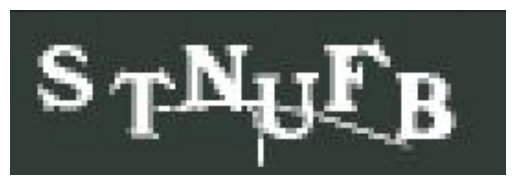

In [27]:
# código para descargar las imágenes capcha

# !pip install selenium # para instalar selenium

from selenium import webdriver
from selenium.webdriver.common.by import By
from pathlib import Path
from IPython.display import clear_output
import cv2
import matplotlib.pyplot as plt
import os
import time

# Almacenamiento de las catchas renombradas 
out_dir_rename = "catchas_renombrados"
os.makedirs(out_dir_rename, exist_ok=True)

# Configuración de Selenium
options = webdriver.FirefoxOptions()
options.add_argument("--headless")  # Ejecuta Chrome sin GUI
driver = webdriver.Firefox(options=options)
driver_img = webdriver.Firefox(options=options)

# Almacenamiento temporal de imágenes sin nombre
out_dir_tem = "descarga"
os.makedirs(out_dir_tem, exist_ok=True)

# Ingresar a la página del capcha
captcha_url = "https://www2.sunarp.gob.pe/consulta-vehicular/inicio"
driver.get(captcha_url) # Abrir página
time.sleep(tiempo_espera)

for i in range(cant_catchas):
    clear_output(wait=True)

    # Navegar a la URL del CAPTCHA
    image_element = driver.find_element(By.ID, "image")
    image_url = image_element.get_attribute("src")
    driver_img.get(image_url)

    # Guardar la imagen en el disco
    filename = out_dir_tem + "/" + ('00000' + str(i+1))[-5:] + '.png'
    cap = driver_img.find_element(by=By.XPATH, value="/html/body/img").screenshot(filename)
    if cap:
        print(filename, "descargado correctamente")
    else:
        continue
    
    carpeta = Path(out_dir_tem)
    archivo = [arc for arc in carpeta.iterdir()][0]
    if archivo.is_file():
        print("Archivo encontrado:", archivo)
        image = cv2.imread(archivo)
        
        ## Mostrar imagen capcha
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        name_catcha = input().upper()

        while len(name_catcha) != 6:
            print("El nombre del capcha debe ser de 6 letras")
            name_catcha = input()

        # Revisar que el nombre de capcha sea correcto
        plata_input = driver.find_element(By.ID, "nroPlaca")
        plata_input.clear()
        plata_input.send_keys("SSSSSS")
        
        capcha_input = driver.find_element(By.ID, "codigoCaptcha")
        capcha_input.clear()
        capcha_input.send_keys(name_catcha)

        submit_button = driver.find_element(By.XPATH, "//button/span[text()=' Realizar Busqueda ']")
        submit_button.click()
        time.sleep(tiempo_espera)

        text_output = driver.find_element(By.ID, "swal2-title")
        
        if text_output.text == "Captcha inválido":
            print("capcha ingresado:", name_catcha)
            print("El nombre del capcha es incorrecto")
            boton_ok = driver.find_element(By.XPATH, "//button[@type='button' and text()='OK']")
            boton_ok.click()
            time.sleep(3)
        else:
            boton_aceptar = driver.find_element(By.XPATH, "//button/span[text()='Aceptar']")
            boton_aceptar.click()

            output_path = out_dir_rename + "/" + name_catcha + ".png"
            cv2.imwrite(output_path, image)

        ruta_archivo = archivo

        # Verificar si el archivo existe antes de eliminarlo
        if os.path.exists(archivo):
            os.remove(archivo)
        else:
            print(f"El archivo no existe: {archivo}")

# Cerrar el navegador
driver.quit()
driver_img.quit()

## Valance de Catchas

In [1]:
from pathlib import Path

sin_renombrar = Path("descarga")
renombrados = Path("catchas_renombrados")

print("Imágenes sin renombrar:", len([arc for arc in sin_renombrar.iterdir()]))
print("Imágenes renombradas:", len([arc for arc in renombrados.iterdir()]))

Imágenes sin renombrar: 0
Imágenes renombradas: 688


#### Gráfica de conteo

Total:  4128


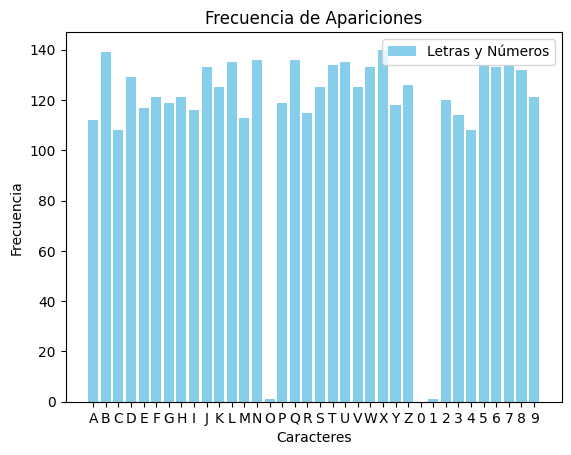

In [2]:
import pandas as pd
from pathlib import Path

letters = [chr((i) + ord("A")) for i in range(26)]
numbers = [str(i) for i in range(10)]
letters_f = [0 for _ in range(26)]
numbers_f = [0 for _ in range(10)]
carpeta = Path("catchas_renombrados")

for archivo in carpeta.iterdir():
    for c in str(archivo)[-10:-4]:
        if 'A' <= c <= 'Z': letters_f[ord(c) - ord("A")] += 1
        if '0' <= c <= '9': numbers_f[ord(c) - ord("0")] += 1

dfL = pd.DataFrame([letters_f], columns=letters)
dfN = pd.DataFrame([numbers_f], columns=numbers)
print("Total: ", sum(letters_f) + sum(numbers_f))

import matplotlib.pyplot as plt

characters, char_frecuency = letters + numbers, letters_f + numbers_f
plt.bar(characters, char_frecuency, color='skyblue', label='Letras y Números')
plt.xlabel('Caracteres')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Apariciones')
plt.legend()
plt.show()